## Background of the project

Cookie Cats is a popular mobile puzzle game by Tactile Entertainment, featuring a classic "connect three" gameplay style. Players connect tiles of the same color to clear the board and progress through levels.

Throughout the game, players encounter gates that require them to wait or make in-app purchases to continue. These gates not only drive purchases but also provide enforced breaks, aiming to enhance player enjoyment. Initially, the first gate was set at level 30, but in this project, we will analyze an A/B test that moved it to level 40, focusing on its impact on player retention.

### Importing necessary libraries

In [6]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import warnings
warnings.filterwarnings('ignore')

### Importing data

In [9]:
cookie_data = pd.read_csv('/Users/faith/Downloads/cookie_cats.csv')

In [10]:
cookie_data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [11]:
cookie_data.dtypes

userid             int64
version           object
sum_gamerounds     int64
retention_1         bool
retention_7         bool
dtype: object

<b> Field details </b> <br>
userid: A unique number that identifies each player.<br>
version: Whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40)<br>
sum_gamerounds: The number of game rounds played by the player during the first 14 days after install.<br>
retention_1: Did the player come back and play 1 day after installing?<br>
retention_7: Did the player come back and play 7 days after installing?

### Exploratory Data Analysis

In [14]:
cookie_data.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [15]:
cookie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [16]:
cookie_data.isna().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [17]:
#Total number of users who downloaded the app but didnt play any games
print(f"Total installed but not played users: {(cookie_data['sum_gamerounds'] == 0).sum()}")

Total installed but not played users: 3994


In [18]:
#exclude non-players
cookie_data = cookie_data[cookie_data['sum_gamerounds']>0]

In [19]:
ret1 = len(cookie_data[cookie_data['retention_1'] == True])
ret7 = len(cookie_data[cookie_data['retention_7'] == True])

print(f"Retention 1-day: {ret1}")
print(f"Retention 7-day: {ret7}")

Retention 1-day: 40066
Retention 7-day: 16752


In [20]:
#Retention by gate version
numb_ret1_gate_30 = cookie_data[(cookie_data['retention_1'] == True) & (cookie_data['version'] == 'gate_30')].shape[0]
numb_ret1_gate_40 = cookie_data[(cookie_data['retention_1'] == True) & (cookie_data['version'] == 'gate_40')].shape[0]

numb_ret7_gate_30 = cookie_data[(cookie_data['retention_7'] == True) & (cookie_data['version'] == 'gate_30')].shape[0]
numb_ret7_gate_40 = cookie_data[(cookie_data['retention_7'] == True) & (cookie_data['version'] == 'gate_40')].shape[0]

# results for gate_30
print("Gate 30 Stats:")
print(f"Number of users retained on 1-day: {numb_ret1_gate_30}")
print(f"Number of users retained on 7-day: {numb_ret7_gate_30}")


# Print the results for gate_40
print("Gate 40 Stats:")
print(f"Gate 40 - Number of users retained on 1-day: {numb_ret1_gate_40}")
print(f"Gate 40 - Number of users retained on 7-day: {numb_ret7_gate_40}")



Gate 30 Stats:
Number of users retained on 1-day: 19993
Number of users retained on 7-day: 8486
Gate 40 Stats:
Gate 40 - Number of users retained on 1-day: 20073
Gate 40 - Number of users retained on 7-day: 8266


In [21]:
print("\nVersion breakdown:")
print(cookie_data['version'].value_counts())


Version breakdown:
version
gate_40    43432
gate_30    42763
Name: count, dtype: int64


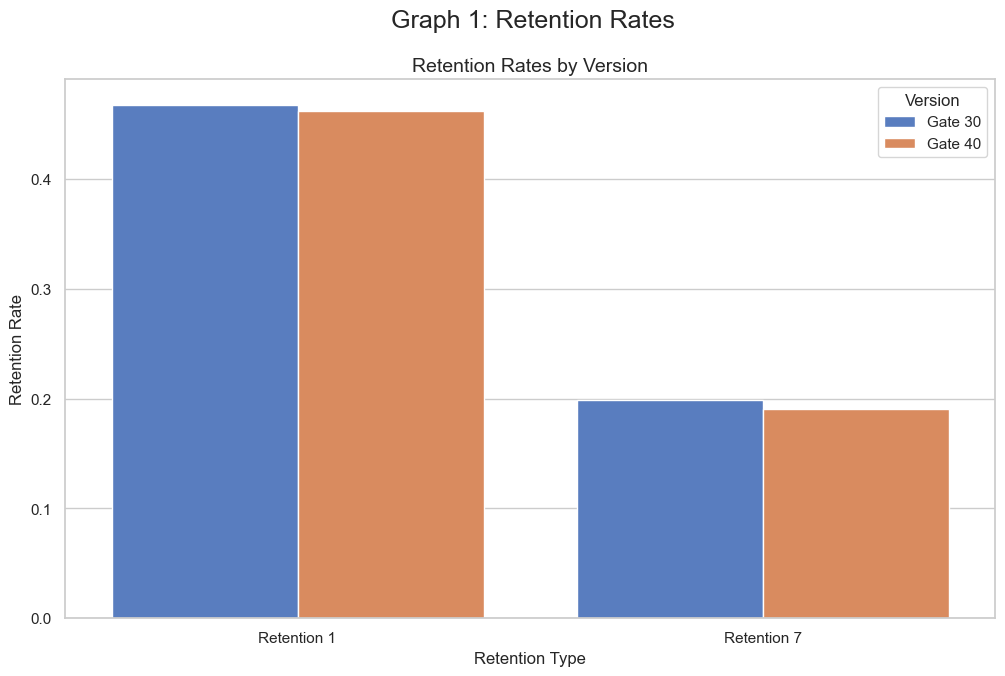

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# mean retention_1 and retention_7 by version
retention_1 = cookie_data.groupby("version").retention_1.mean()
retention_7 = cookie_data.groupby("version").retention_7.mean()

# combining the results into a single df
retention_df = pd.DataFrame({
    'Retention Type': ['Retention 1']*2 + ['Retention 7']*2,
    'Version': ['Gate 30', 'Gate 40']*2,
    'Retention Rate': [retention_1['gate_30'], retention_1['gate_40'], retention_7['gate_30'], retention_7['gate_40']]
})

sns.set(style="whitegrid")

# plotting
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='Retention Type', y='Retention Rate', hue='Version', data=retention_df, palette="muted")

plt.suptitle("Graph 1: Retention Rates", fontsize=18, x=0.515)
plt.title("Retention Rates by Version", fontsize=14)
plt.xlabel("Retention Type", fontsize=12)
plt.ylabel("Retention Rate", fontsize=12)

plt.show()

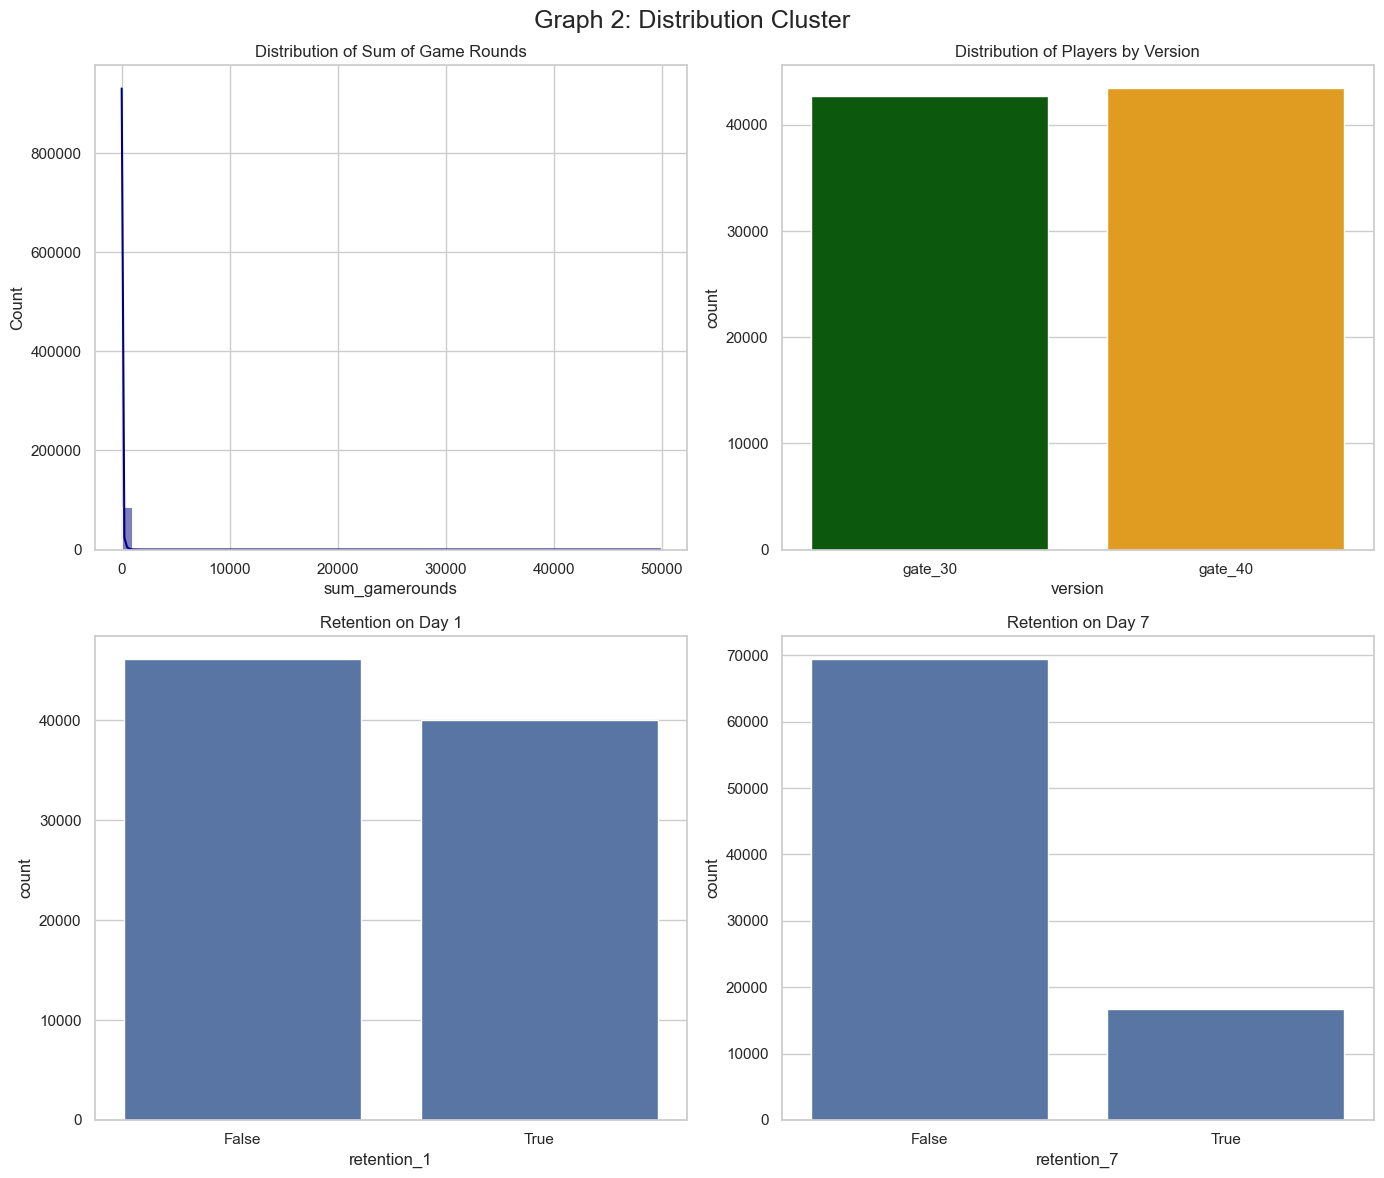

In [23]:
plt.figure(figsize=(14, 12))

# Plotting distribution of sum_gamerounds
plt.subplot(2, 2, 1)
sns.histplot(cookie_data['sum_gamerounds'], bins=50, kde=True, color='navy')
plt.title('Distribution of Sum of Game Rounds')

# Plotting bar plot of version (control vs. test groups)
plt.subplot(2, 2, 2)
sns.countplot(x='version', data=cookie_data, palette={'gate_30': 'darkgreen', 'gate_40': 'orange'})
plt.title('Distribution of Players by Version')

# Plotting retention_1
plt.subplot(2, 2, 3)
sns.countplot(x='retention_1', data=cookie_data)
plt.title('Retention on Day 1')

# Plotting retention_7
plt.subplot(2, 2, 4)
sns.countplot(x='retention_7', data=cookie_data)
plt.title('Retention on Day 7')

plt.suptitle("Graph 2: Distribution Cluster", fontsize=18)
plt.tight_layout()
plt.show()

## Dealing with Outliers

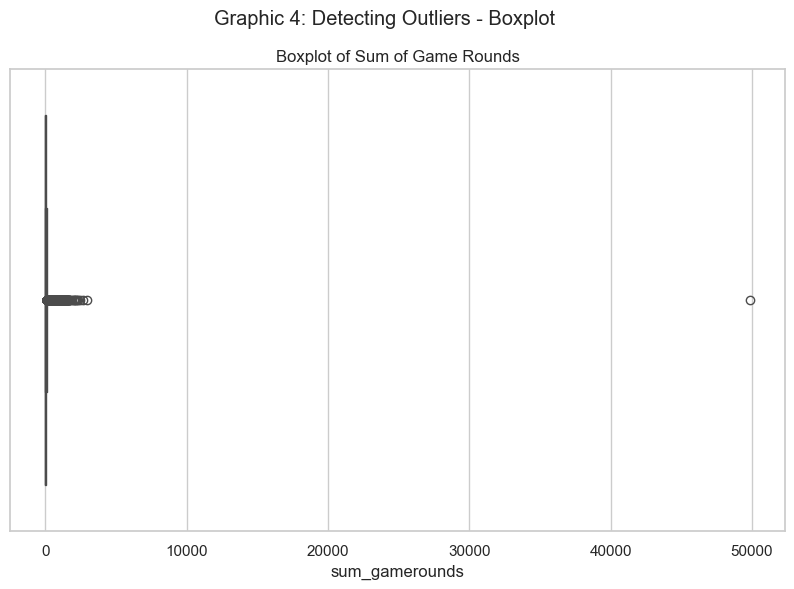

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cookie_data['sum_gamerounds'])

plt.suptitle("Graphic 4: Detecting Outliers - Boxplot")
plt.title('Boxplot of Sum of Game Rounds')
plt.show()

In [26]:
# remember that Q1 = 25th percentile and Q3 = 75th percentile
Q1 = cookie_data['sum_gamerounds'].quantile(0.25)
Q3 = cookie_data['sum_gamerounds'].quantile(0.75)

# we can now calculate the IQR
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cookie_data['sum_gamerounds_capped'] = cookie_data['sum_gamerounds'].apply(lambda x: upper_bound if x > upper_bound else x)

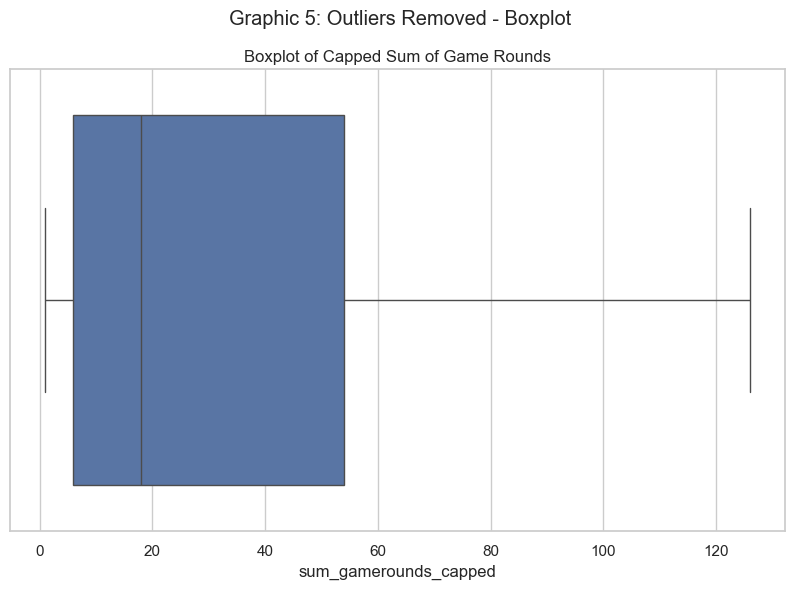

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=cookie_data['sum_gamerounds_capped'])
plt.suptitle("Graphic 5: Outliers Removed - Boxplot", x=0.515)
plt.title('Boxplot of Capped Sum of Game Rounds')
plt.show()

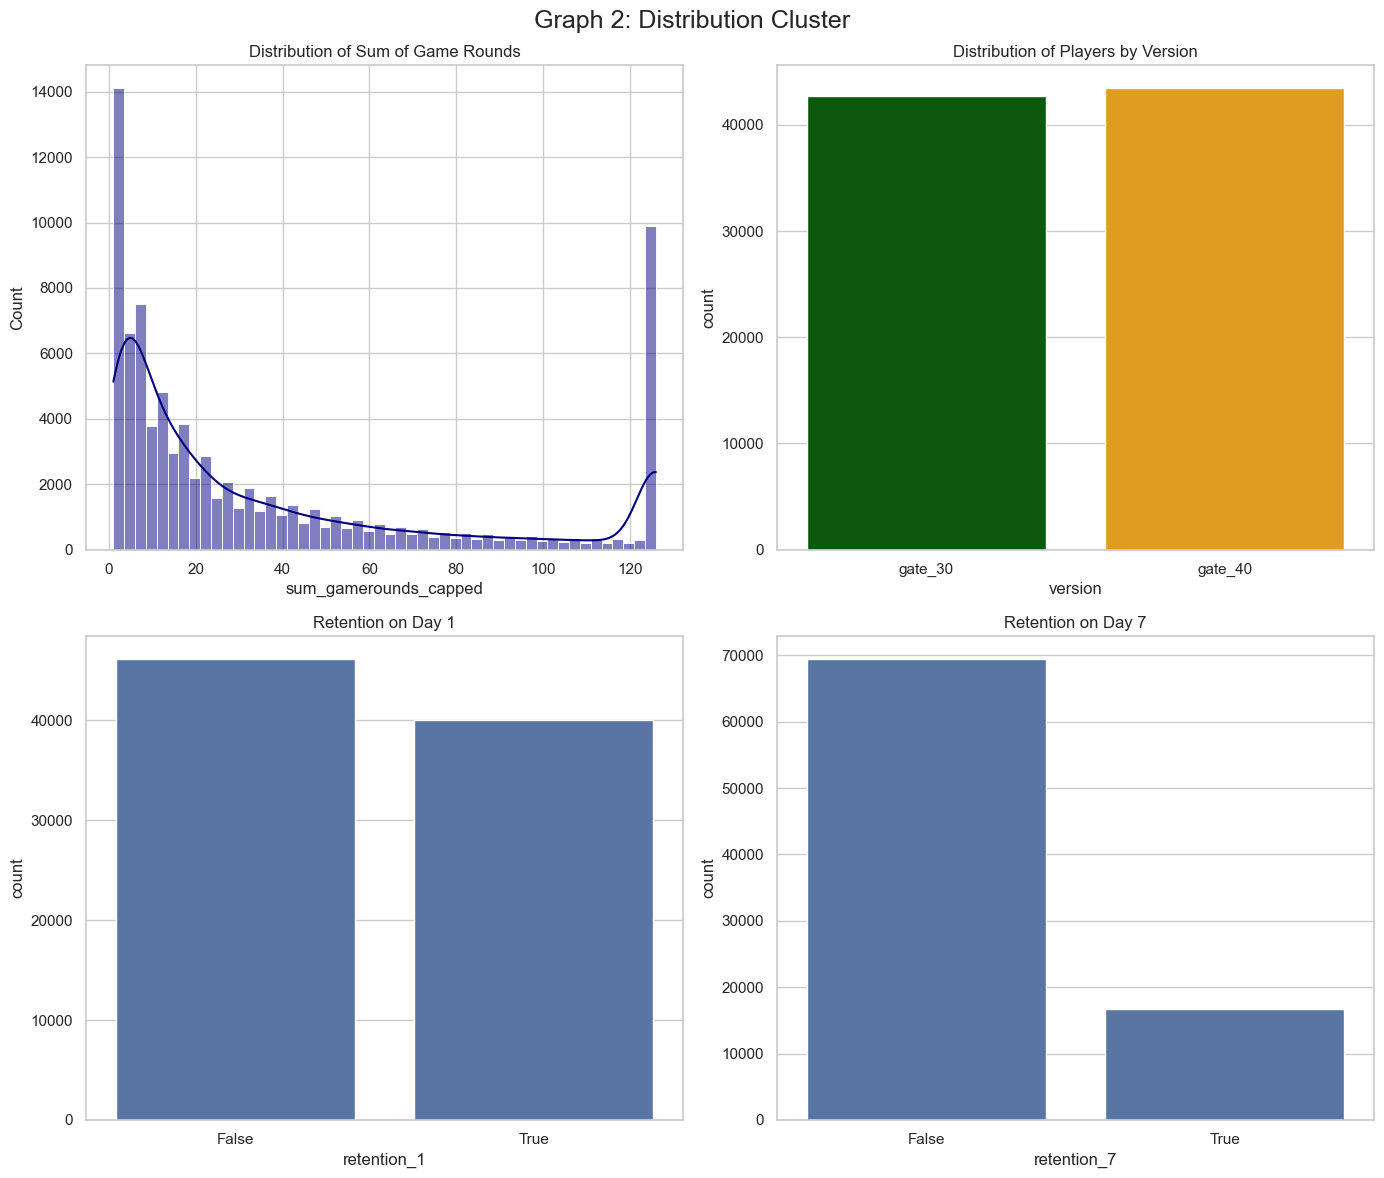

In [28]:
plt.figure(figsize=(14, 12))

# Plotting distribution of sum_gamerounds
plt.subplot(2, 2, 1)
sns.histplot(cookie_data['sum_gamerounds_capped'], bins=50, kde=True, color='navy')
plt.title('Distribution of Sum of Game Rounds')

# Plotting bar plot of version (control vs. test groups)
plt.subplot(2, 2, 2)
sns.countplot(x='version', data=cookie_data, palette={'gate_30': 'darkgreen', 'gate_40': 'orange'})
plt.title('Distribution of Players by Version')

# Plotting retention_1
plt.subplot(2, 2, 3)
sns.countplot(x='retention_1', data=cookie_data)
plt.title('Retention on Day 1')

# Plotting retention_7
plt.subplot(2, 2, 4)
sns.countplot(x='retention_7', data=cookie_data)
plt.title('Retention on Day 7')

plt.suptitle("Graph 2: Distribution Cluster", fontsize=18)
plt.tight_layout()
plt.show()

## Feature Engineering

In [30]:
# first up, create new variable for high engagement (e.g., players who played more than the median number of rounds)
cookie_data['high_engagement'] = cookie_data['sum_gamerounds'] > cookie_data['sum_gamerounds'].median()

# next we can also create a new metric based on the level of engagement
cookie_data['engagement_score'] = cookie_data['sum_gamerounds'] / cookie_data['sum_gamerounds'].max()

In [31]:
# then we must find our true believers! thus we create a new variable for players retained both on day 1 and day 7
cookie_data['retained_both_days'] = cookie_data['retention_1'] & cookie_data['retention_7']


In [32]:
# Retention rate for each version (day 1 and day 7)
retention_rate_day_1 = cookie_data.groupby('version')['retention_1'].mean()
retention_rate_day_7 = cookie_data.groupby('version')['retention_7'].mean()

# Display retention rates
print("\nRetention Rates:")
print("Day 1 Retention Rate by Version:")
print(retention_rate_day_1)
print("\nDay 7 Retention Rate by Version:")
print(retention_rate_day_7)


Retention Rates:
Day 1 Retention Rate by Version:
version
gate_30    0.467530
gate_40    0.462171
Name: retention_1, dtype: float64

Day 7 Retention Rate by Version:
version
gate_30    0.198443
gate_40    0.190321
Name: retention_7, dtype: float64


## Hypothesis

Compare player retention (retention_1 and retention_7) and the number of game rounds played (sum_gamerounds) between the two groups to determine which gate placement is more effective.

Null Hypothesis (H0): There is no difference in player retention and game rounds played between the two gate placements.<br>
Alternative Hypothesis (H1): There is a significant difference in player retention and game rounds played between the two gate placements.

## Student's T Test

In [37]:
from scipy.stats import ttest_ind

# Separate the two groups
gate_30 = cookie_data[cookie_data['version'] == 'gate_30']['sum_gamerounds']
gate_40 = cookie_data[cookie_data['version'] == 'gate_40']['sum_gamerounds']

# Perform the t-test
t_stat, p_value = ttest_ind(gate_30, gate_40)
t_stat, p_value

(0.8135520130145113, 0.4159038852102884)

## Testing for normality

In [39]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# first let's set our two groups: gate 30 and 40
gate_30 = cookie_data[cookie_data['version'] == 'gate_30']['sum_gamerounds']
gate_40 = cookie_data[cookie_data['version'] == 'gate_40']['sum_gamerounds']

# Then run a Shapiro-Wilk test for normality
shapiro_30 = shapiro(gate_30)
shapiro_40 = shapiro(gate_40)

print("Shapiro-Wilk Test for Gate 30:", shapiro_30)
print("Shapiro-Wilk Test for Gate 40:", shapiro_40)

# If both of the p-values > 0.05, we can proceed with the T-test
if shapiro_30.pvalue > 0.05 and shapiro_40.pvalue > 0.05:
    t_stat, p_value = ttest_ind(gate_30, gate_40)
    print("T-test results:", t_stat, p_value)
else:
    # otherwise we can use Mann-Whitney U Test
    u_stat, p_value_mw = mannwhitneyu(gate_30, gate_40)
    print("\nMann-Whitney U Test results", "\nU stat:", u_stat, "\np-value: ", p_value_mw)

Shapiro-Wilk Test for Gate 30: ShapiroResult(statistic=0.08853907417215756, pvalue=4.834870454400196e-156)
Shapiro-Wilk Test for Gate 40: ShapiroResult(statistic=0.48914991528394025, pvalue=1.6191902051111052e-138)

Mann-Whitney U Test results 
U stat: 934375555.0 
p-value:  0.11628458958498969


Interpreting Results Shapiro Wilk test failed, meaning we have no normal distribution and cannot use parametric tests.

Mann-Whitney U test: This is a non-parametric statistical test (i.e. normality not required) that attempts to determine whether there is a difference between two samples. Interpreting the results we see that if the u_stat has higher values than 1, that means that there is indeed differences between the two samples (we have a u-stat of 10+). We can also see that p-value is quite literally on the very threshold of acceptance (0.05%) meaning that the results are statistically significant! Let's examine the results of Mann-Whitney U test below.

Now, let's find the r statistic from the Mann-Whitney U test.

The r statistic measures the effect size and ranges between -1 to +1, indicating the effect strength of the difference between the two samples (in our case gate 30 and gate 40). As expected, any effect size below 0.3 is a very low effect stregth, while anything above 0.5 indicates high effect strength.

Let's find the r!

For that we need to follow the next steps: 1) find the sample sizes for gate 30 and gate 40 2) calculate the mean and std (standard deviation) 3) calculate the z-scores 4) find the r - great success!

In [43]:
# 1) find sample sizes

n1 = len(gate_30)
n2 = len(gate_40)
N = n1 + n2

In [70]:
# 2) calculate mean and standard deviation for MWU (Mann-Whitney U test)

mean_MWU = n1 * n2 / 2
std_MWU = np.sqrt((n1 * n2 * (N + 1)) / 12)

In [72]:
# calculate Z-score

Z = (u_stat - mean_MWU) / std_MWU

In [74]:
# 4) cCalculate effect size r
r = Z / np.sqrt(N)

In [78]:
print("\nMann-Whitney U Test results:")
print("U statistic:", u_stat)
print("P-value:", p_value_mw)
print("Effect size (r):", r)


Mann-Whitney U Test results:
U statistic: 934375555.0
P-value: 0.11628458958498969
Effect size (r): 0.0053474093234505875


it is expected to have a minimum value of zero and a max value of n1 * n2, which is shown below:

In [81]:
print(f"Max value of U stat: {n1*n2}")
print(f"Current value of U stat: {u_stat}")
print(f"%Percentage diff U stat: {round(u_stat/(n1*n2),3)*100}%")


Max value of U stat: 1857282616
Current value of U stat: 934375555.0
%Percentage diff U stat: 50.3%


Even though the U statistic seems relatively high (50.3% of the max possible), this does not necessarily mean there is a significant or important difference between the groups.

An effect size of 0.005 is very small, indicating a very weak difference between the groups. This further supports the conclusion that any difference between the groups is likely to be trivial.